# Semester project - Taerim Lee

An insurance company to analyze customer and sales data (caravan.train). These data contain 86 different kinds of information about the company’s customers (see caravan.info). The insurance company would like to know from you which
customers (caravan.test) could be interested in a caravan insurance and especially why.
The insurance company expects you to present your results in a credible manner – only
then will the results be taken into account in the company’s decision-making processes.


### Contents: 1. Data preprocessing    2. Decision Tree    3. Random Forest

## 1. Data preprocessing

Let's check the data how it is organized. There are "caravan.train" and "caravan.test", so we don't have to split the data.
There are 85 columns for the test data and 86 columns for train data. The column 86 from the train data is for classification of the people who bought the insurance for caravans as 1 and the others as 0. 

In [3]:
import pandas as pd
import numpy as np
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('caravan.train', delimiter ='\t', header=None)
test = pd.read_csv('caravan.test', delimiter ='\t', header = None)
train.columns = np.arange(1, train.shape[1]+1)
test.columns = np.arange(1, test.shape[1]+1)
train.index = np.arange(1, len(train)+1)
test.index = np.arange(1, len(test)+1)

### 1-1. Change the names of the columns for recognizing easily.

There was no information when you only see the train and test data, but the names of columns are added later for convenience's sake.

In [5]:
test.columns = ['Customer Subtype', 'Number of houses','Avg size household', 'Avg age', 'Customer main type', 'Roman catholic', 'Protestant', 'Other religion', 'No religion', 'Married', 'Living together', 'Other relation', 'Singles', 'Household without children', 'Household with children', 'High level education', 'Medium level education', 'Lower level education', 'High status', 'Entrepreneur', 'Farmer', 'Middle management', 'Skilled labourers', 'Unskilled labourers', 'Social class A', 'Social class B1', 'Social class B2', 'Social class C', 'Social class D', 'Rented house', 'Home owners', '1 car', '2 cars', 'No car', 'National Health Service', 'Private health insurance', 'Income < 30.000', 'Income 30-45.000','Income 45-75.000', 'Income 75-122.000', 'Income >123.000', 'Average income', 'Purchasing power class', 'Contribution private third party insurance', 'Contribution third party insurance (firms)', 'Contribution third party insurane (agriculture)', 'Contribution car policies', 'Contribution delivery van policies', 'Contribution motorcycle/scooter policies', 'Contribution lorry policies', 'Contribution trailer policies', 'Contribution tractor policies', 'Contribution agricultural machines policies','Contribution moped policies', 'Contribution life insurances', 'Contribution private accident insurance policies', 'Contribution family accidents insurance policies', 'Contribution disability insurance policies', 'Contribution fire policies', 'Contribution surfboard policies', 'Contribution boat policies', 'Contribution bicycle policies', 'Contribution property insurance policies', 'Contribution social security insurance policies', 'Number of private third party insurance', 'Number of third party insurance (firms)', 'Number of third party insurane (agriculture)', 'Number of car policies', 'Number of delivery van policies', 'Number of motorcycle/scooter policies', 'Number of lorry policies', 'Number of trailer policies', 'Number of tractor policies', 'Number of agricultural machines policies', 'Number of moped policies', 'Number of life insurances', 'Number of private accident insurance policies', 'Number of family accidents insurance policies', 'Number of disability insurance policies', 'Number of fire policies', 'Number of surfboard policies', 'Number of boat policies', 'Number of bicycle policies', 'Number of property insurance policies', 'Number of social security insurance policies' ]

In [6]:
train.columns = ['Customer Subtype', 'Number of houses','Avg size household', 'Avg age', 'Customer main type', 'Roman catholic', 'Protestant', 'Other religion', 'No religion', 'Married', 'Living together', 'Other relation', 'Singles', 'Household without children', 'Household with children', 'High level education', 'Medium level education', 'Lower level education', 'High status', 'Entrepreneur', 'Farmer', 'Middle management', 'Skilled labourers', 'Unskilled labourers', 'Social class A', 'Social class B1', 'Social class B2', 'Social class C', 'Social class D', 'Rented house', 'Home owners', '1 car', '2 cars', 'No car', 'National Health Service', 'Private health insurance', 'Income < 30.000', 'Income 30-45.000','Income 45-75.000', 'Income 75-122.000', 'Income >123.000', 'Average income', 'Purchasing power class', 'Contribution private third party insurance', 'Contribution third party insurance (firms)', 'Contribution third party insurane (agriculture)', 'Contribution car policies', 'Contribution delivery van policies', 'Contribution motorcycle/scooter policies', 'Contribution lorry policies', 'Contribution trailer policies', 'Contribution tractor policies', 'Contribution agricultural machines policies','Contribution moped policies', 'Contribution life insurances', 'Contribution private accident insurance policies', 'Contribution family accidents insurance policies', 'Contribution disability insurance policies', 'Contribution fire policies', 'Contribution surfboard policies', 'Contribution boat policies', 'Contribution bicycle policies', 'Contribution property insurance policies', 'Contribution social security insurance policies', 'Number of private third party insurance', 'Number of third party insurance (firms)', 'Number of third party insurane (agriculture)', 'Number of car policies', 'Number of delivery van policies', 'Number of motorcycle/scooter policies', 'Number of lorry policies', 'Number of trailer policies', 'Number of tractor policies', 'Number of agricultural machines policies', 'Number of moped policies', 'Number of life insurances', 'Number of private accident insurance policies', 'Number of family accidents insurance policies', 'Number of disability insurance policies', 'Number of fire policies', 'Number of surfboard policies', 'Number of boat policies', 'Number of bicycle policies', 'Number of property insurance policies', 'Number of social security insurance policies', 'Caravan' ]

In [7]:
test

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies
1,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
2,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
3,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
4,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
5,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,33,1,2,4,8,0,7,2,0,5,...,0,0,0,0,1,0,0,0,0,0
3997,24,1,2,3,5,1,5,1,3,4,...,1,0,0,0,1,0,0,0,0,0
3998,36,1,2,3,8,1,5,1,3,7,...,0,0,0,0,1,0,0,0,1,0
3999,33,1,3,3,8,1,4,2,3,7,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Caravan
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
5819,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
5820,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1
5821,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0


### 1-2. Check missing values from the train data set and the test data set.

Each column is checked if there is any 'Null' value contained. Both of datasets do not have any 'Null' value.

In [109]:
test.info()
train.info()

{
    "tags": [
        "hide-output"
    ]
}

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 85 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Customer Subtype                                  4000 non-null   int64
 1   Number of houses                                  4000 non-null   int64
 2   Avg size household                                4000 non-null   int64
 3   Avg age                                           4000 non-null   int64
 4   Customer main type                                4000 non-null   int64
 5   Roman catholic                                    4000 non-null   int64
 6   Protestant                                        4000 non-null   int64
 7   Other religion                                    4000 non-null   int64
 8   No religion                                       4000 non-null   int64
 9   Married                                  

{'tags': ['hide-output']}

In [10]:
train.describe()

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Caravan
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [11]:
test.describe()

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,24.253000,1.10600,2.675750,3.004000,5.787000,0.706750,4.653250,1.021250,3.269500,6.197000,...,0.084500,0.003500,0.010000,0.00375,0.579750,0.001500,0.003750,0.031000,0.009250,0.013250
std,13.022822,0.42108,0.767306,0.790025,2.899609,1.032241,1.729093,1.001274,1.618958,1.876585,...,0.394206,0.059065,0.099511,0.06113,0.560106,0.038706,0.072369,0.206276,0.095743,0.114358
min,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.00000,2.000000,3.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.00000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.00000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.00000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,5.000000,1.000000,1.000000,1.00000,6.000000,1.000000,2.000000,4.000000,1.000000,1.000000


### 1-3. Make a histogram of the whole train data set.

The histogram is drown for checking the variation of each column.

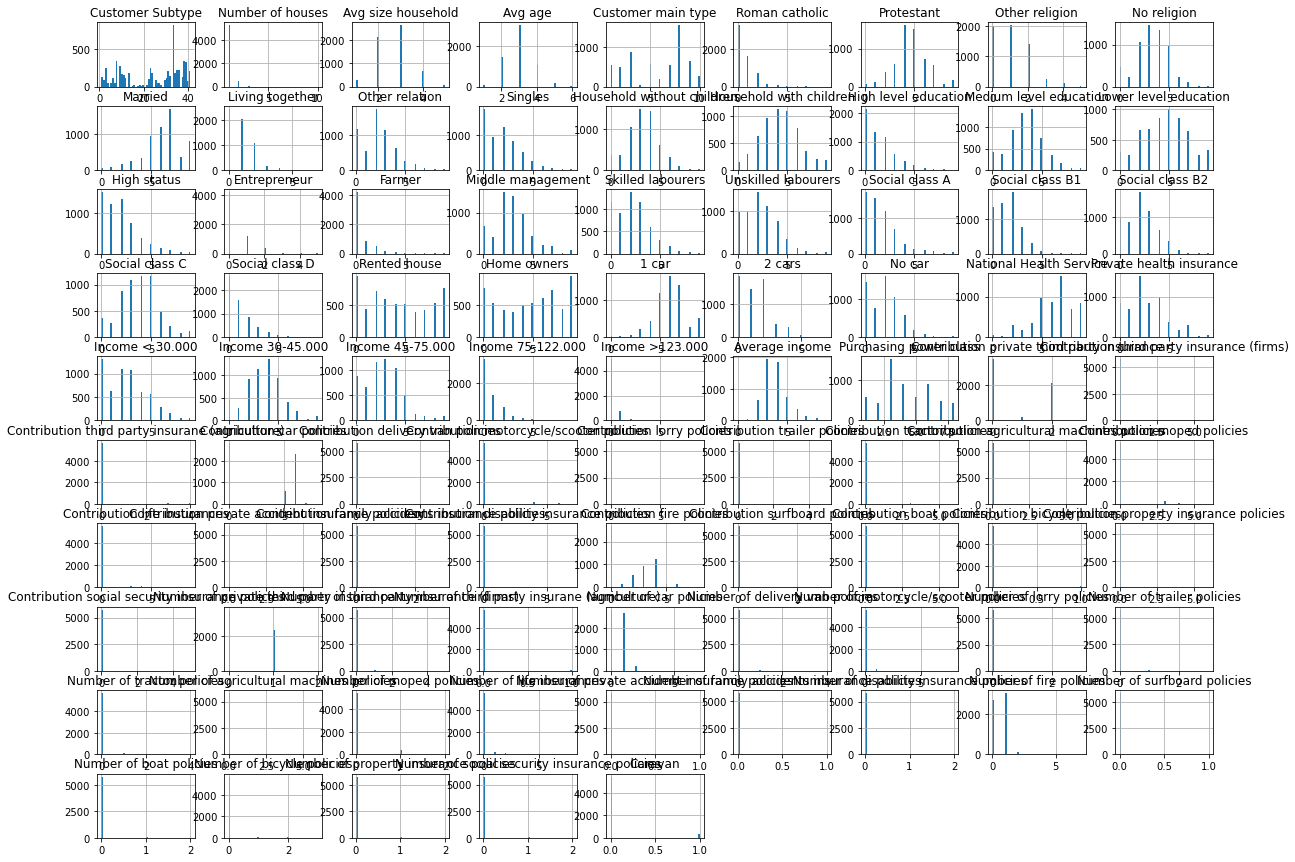

In [12]:
train.hist(bins = 50, figsize = (20,15)) 
plt.show()

### 1-4. Check how many people bought the caravans from train data set approximately.

<AxesSubplot:xlabel='Caravan', ylabel='count'>

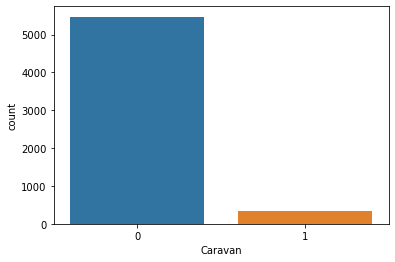

In [13]:
import seaborn as sns

sns.countplot(x = train['Caravan'], data = train)

### 1-5. Extract the information from people who bought the caravan from the train data set.

Check the people who already bought the insurance and briefly the conditions of them.

In [14]:
col86 = train[train['Caravan'] == 1]
col86
col86.describe()
col86.mean()
col86

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Caravan
42,11,1,3,3,3,2,7,0,0,9,...,0,0,0,2,0,0,1,0,0,1
46,38,1,3,3,9,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,1
58,12,1,3,2,3,0,6,0,3,7,...,0,0,1,1,0,0,0,0,0,1
98,9,1,2,3,3,0,6,1,2,7,...,0,0,0,0,0,0,0,0,0,1
99,36,1,2,4,8,2,4,2,2,7,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,6,1,5,3,2,2,4,0,4,4,...,0,0,0,1,0,0,0,0,0,1
5768,3,2,3,3,1,0,6,1,2,6,...,0,0,0,1,0,0,0,0,0,1
5788,8,1,3,3,2,1,5,1,4,6,...,0,0,0,1,0,0,0,0,0,1
5798,8,1,4,3,2,0,6,1,2,7,...,0,0,0,1,0,0,0,0,0,1


### 1-6. Describe the correlation between variable 86 and the others.

In [15]:
corr_matrix = train.corr()
corr_matrix['Caravan'].sort_values(ascending= False)

corr_matrix

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Caravan
Customer Subtype,1.000000,-0.038721,-0.021997,0.009454,0.992672,-0.193613,0.090399,-0.025642,-0.019505,-0.065596,...,0.021707,-0.012060,-0.002909,-0.011512,0.007801,-0.018162,-0.015774,-0.021087,-0.053718,-0.069385
Number of houses,-0.038721,1.000000,0.010102,0.056975,-0.045817,-0.006136,-0.024360,0.012056,0.020540,0.023025,...,0.003321,0.009444,-0.016333,0.000655,-0.006189,0.000666,-0.020993,0.018304,-0.004166,-0.009809
Avg size household,-0.021997,0.010102,1.000000,-0.328257,0.016115,0.013105,0.049356,-0.108650,-0.005527,0.534798,...,-0.000128,0.016760,0.018749,-0.009269,0.009234,0.000644,0.030330,0.025907,0.028384,0.035573
Avg age,0.009454,0.056975,-0.328257,1.000000,0.003872,-0.037519,0.093654,0.057737,-0.119966,-0.040384,...,0.021070,-0.001747,0.000644,0.024417,0.000244,-0.001791,0.020612,-0.020042,-0.014540,0.004491
Customer main type,0.992672,-0.045817,0.016115,0.003872,1.000000,-0.199186,0.098493,-0.034566,-0.021466,-0.026619,...,0.023976,-0.010004,-0.002243,-0.012372,0.007099,-0.020683,-0.017990,-0.020997,-0.051723,-0.069300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Number of boat policies,-0.018162,0.000666,0.000644,-0.001791,-0.020683,0.011795,0.018468,0.009417,-0.026407,-0.001566,...,0.023526,-0.005970,-0.004413,0.000177,0.091052,1.000000,-0.011093,0.040094,0.026325,0.105700
Number of bicycle policies,-0.015774,-0.020993,0.030330,0.020612,-0.017990,-0.001503,0.001906,0.025661,-0.011122,0.020921,...,-0.011020,0.038345,-0.009025,-0.031095,-0.003420,-0.011093,1.000000,0.004845,0.009246,0.034144
Number of property insurance policies,-0.021087,0.018304,0.025907,-0.020042,-0.020997,-0.011431,0.002392,-0.009734,0.007261,-0.003420,...,-0.006391,0.016501,-0.005234,0.026274,0.081689,0.040094,0.004845,1.000000,0.021273,0.018026
Number of social security insurance policies,-0.053718,-0.004166,0.028384,-0.014540,-0.051723,-0.004009,0.016658,0.010127,-0.027291,0.036569,...,-0.008693,0.114810,-0.007119,0.034854,-0.002698,0.026325,0.009246,0.021273,1.000000,0.066658


### 1-7. Find significant important variables regarding of the correlation between variable 86 and the others.

In [16]:
corr_matrix[corr_matrix > 0.5].describe

<bound method NDFrame.describe of                                               Customer Subtype  \
Customer Subtype                                      1.000000   
Number of houses                                           NaN   
Avg size household                                         NaN   
Avg age                                                    NaN   
Customer main type                                    0.992672   
...                                                        ...   
Number of boat policies                                    NaN   
Number of bicycle policies                                 NaN   
Number of property insurance policies                      NaN   
Number of social security insurance policies               NaN   
Caravan                                                    NaN   

                                              Number of houses  \
Customer Subtype                                           NaN   
Number of houses                         

### 1-8. Visualize about correlation of variables.

Draw a heatmap that shows the correlation between variables using seaborn library. 

<AxesSubplot:>

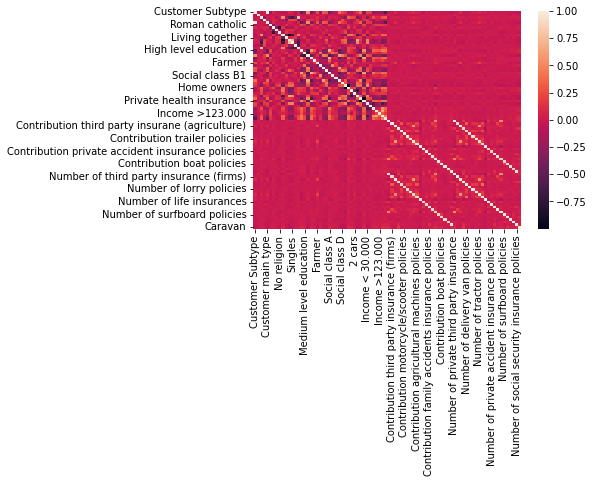

In [17]:
sns.heatmap(corr_matrix)

### 1-9. Checking outliers with IQR Method and remove outliers, but there is no outlier.

If there is any observation that is more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3, we need to sort out this.

In [18]:
number_train = train.select_dtypes(exclude = ['object', 'bool'])
number_names = number_train.columns
Q1 = number_train.quantile(0.25)
Q3 = number_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
number_train[(number_train >= (Q1 - 1.5 * IQR)) & (number_train <= (Q3 + 1.5 * IQR))].shape

Customer Subtype                                25.0
Number of houses                                 0.0
Avg size household                               1.0
Avg age                                          1.0
Customer main type                               5.0
                                                ... 
Number of boat policies                          0.0
Number of bicycle policies                       0.0
Number of property insurance policies            0.0
Number of social security insurance policies     0.0
Caravan                                          0.0
Length: 86, dtype: float64


(5822, 86)

## 2. Decision Tree

### 2-1. Split the data to the train data and the test data from the train data set.

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
train.iloc[:,0:85]

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,36,1,1,2,8,0,6,1,2,1,...,2,0,0,0,1,0,0,0,0,0
5819,35,1,4,4,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
5820,33,1,3,4,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
5821,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0


In [21]:
train.iloc[:,85]

1       0
2       0
3       0
4       0
5       0
       ..
5818    0
5819    0
5820    1
5821    0
5822    0
Name: Caravan, Length: 5822, dtype: int64

### 2-2. Find the best hyperparameter.

Set some range of the estimated number of components, types of criterion, maximum depth, minimum number of leaf sameples and minimum number of samples for each split. And check which one is the optimal for the classification.

In [22]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [23]:
train_x = train.iloc[:,0:85]
train_y = train.iloc[:,85]
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', StandardScaler()), ('dec_tree', dec_tree)])
n_components = list(range(1,train_x.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10]
min_samples_leaf =  [3, 5, 7, 10]
min_samples_split =  [2, 3, 5, 10]
parameters = dict(dec_tree__criterion=criterion, dec_tree__max_depth=max_depth, 
                  dec_tree__min_samples_leaf = min_samples_leaf,dec_tree__min_samples_split = min_samples_split)

In [24]:
clf_GS = GridSearchCV(pipe, parameters, cv= 10)

In [25]:
clf_GS.fit(train_x, train_y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10],
                         'dec_tree__min_samples_leaf': [3, 5, 7, 10],
                         'dec_tree__min_samples_split': [2, 3, 5, 10]})

In [26]:
clf_GS.best_params_
# sometimes 'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 2 - not true
# sometimes 'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 4

{'dec_tree__criterion': 'gini',
 'dec_tree__max_depth': 4,
 'dec_tree__min_samples_leaf': 3,
 'dec_tree__min_samples_split': 3}

### 2-3 Plot a graph of the train scores depending on max depths.

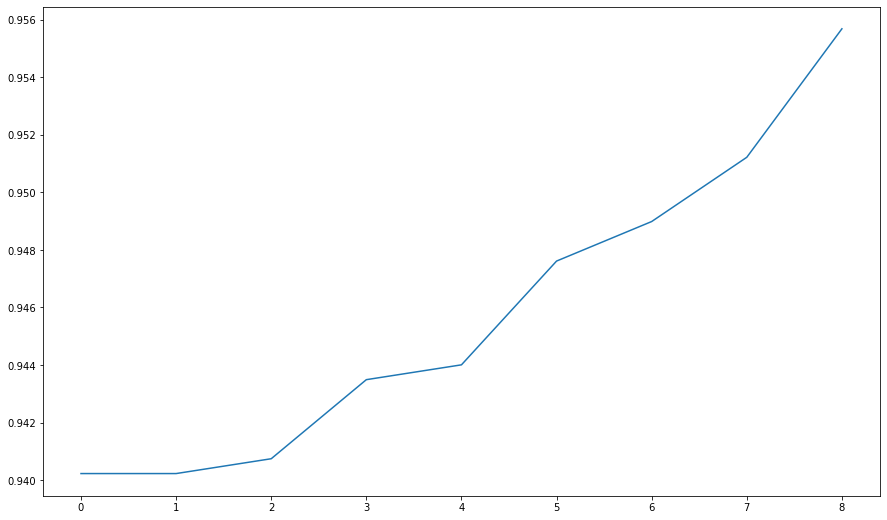

In [27]:
train_score = []

for max_depth in range(1,10):
    tree = DecisionTreeClassifier(random_state=0, max_depth=max_depth, criterion = "gini")
    tree.fit(train_x, train_y)
    train_score.append(tree.score(train_x, train_y))
    
plt.figure(figsize=(15,9))
plt.plot(train_score)

### 2-4. Apply the best parameter with decision tree classifier and check the score of the model.

In [28]:
train_x = train.iloc[:,0:85]
train_y = train.iloc[:,85]
tree_clf = DecisionTreeClassifier(max_depth = 4, criterion = "gini", min_samples_leaf = 3,
 min_samples_split = 3)
tree_clf = tree_clf.fit(train_x, train_y)

In [29]:
tree_clf.score(train_x, train_y)

0.9433184472689797

### 2-5. Build a text report showing the rules of a decision tree.

In [30]:
from sklearn.tree import export_text
text_representation = export_text(tree_clf)
print(text_representation)

|--- feature_46 <= 5.50
|   |--- feature_60 <= 2.50
|   |   |--- feature_57 <= 5.50
|   |   |   |--- feature_36 <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_36 >  2.50
|   |   |   |   |--- class: 0
|   |   |--- feature_57 >  5.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_60 >  2.50
|   |   |--- feature_21 <= 2.50
|   |   |   |--- class: 0
|   |   |--- feature_21 >  2.50
|   |   |   |--- feature_0 <= 9.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  9.00
|   |   |   |   |--- class: 1
|--- feature_46 >  5.50
|   |--- feature_4 <= 2.50
|   |   |--- feature_58 <= 3.50
|   |   |   |--- feature_23 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_23 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_58 >  3.50
|   |   |   |--- feature_23 <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_23 >  3.50
|   |   |   |   |--- clas

### 2-6. Make a decision tree.

There are blue boxes labeled "Purchase" in the tree and column 86 shows 1.

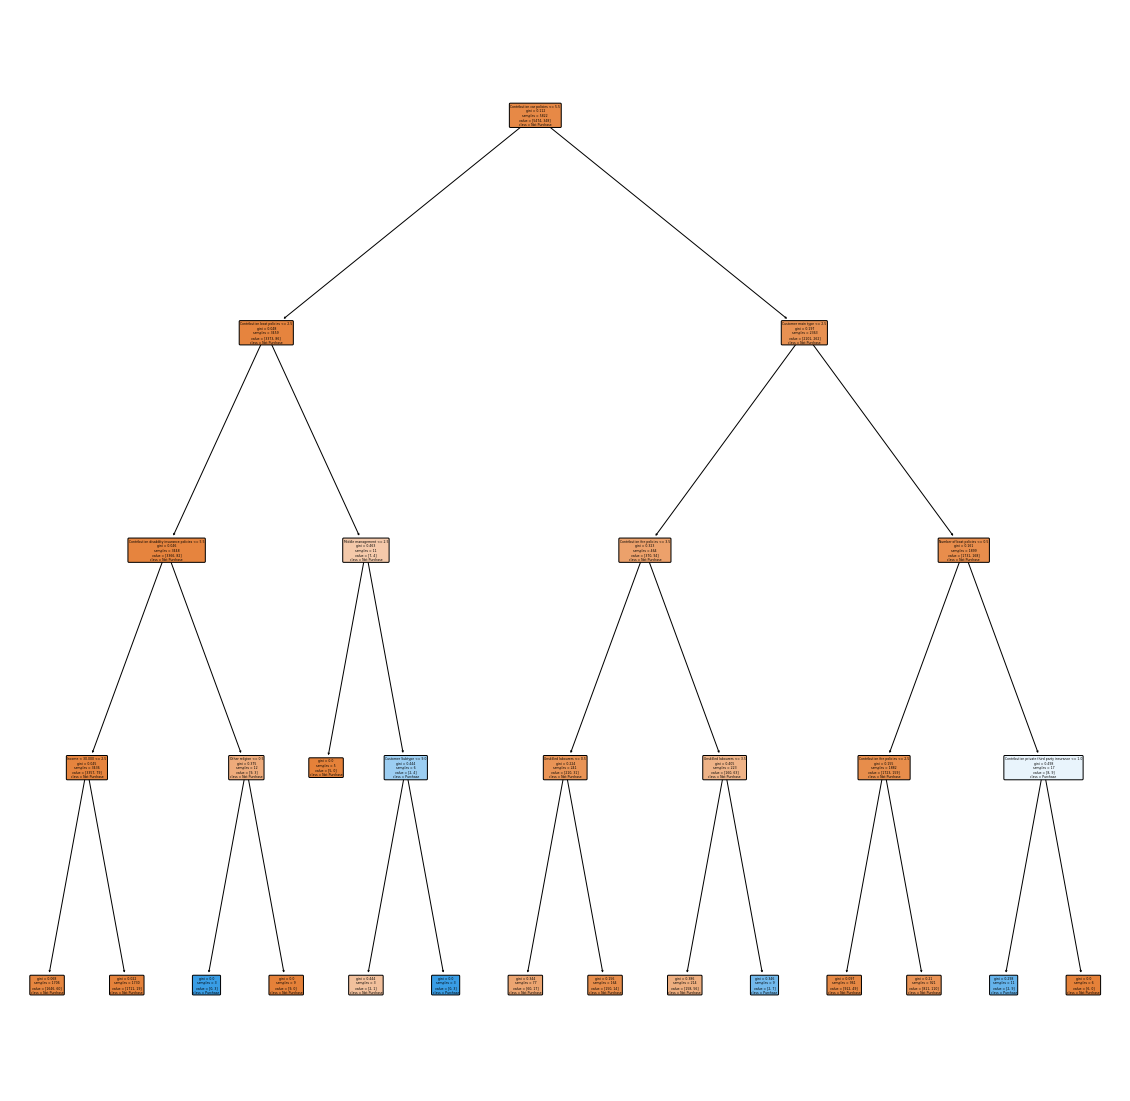

In [108]:
from sklearn import tree
fig = plt.figure(figsize=(20, 20)) 
_ = tree.plot_tree(tree_clf, 
                   filled=True, feature_names= train.columns, rounded=True, class_names = ["Not Purchase","Purchase"])
fig.savefig("decistion_tree.png")

In [32]:
tree_clf.score(train_x, train_y)

0.9433184472689797

### 2-7. Check the feature importance with the tree is producted.

In [33]:
importances = tree_clf.feature_importances_
importances

array([0.01857109, 0.        , 0.        , 0.        , 0.13527598,
       0.        , 0.        , 0.06267743, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03376562, 0.        , 0.09084774, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01399834, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.07239746, 0.        ,
       0.        , 0.28933583, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01716638, 0.13777717, 0.        ,
       0.03527963, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

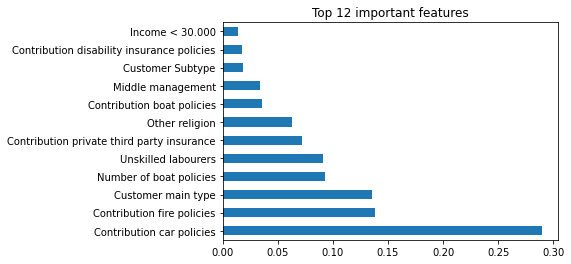

In [34]:
feat_importances = pd.Series(tree_clf.feature_importances_, index=train_x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.title("Top 12 important features")
plt.show()

Compare between train_x and test.
They have same number of columns.

In [35]:
train_x

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,36,1,1,2,8,0,6,1,2,1,...,2,0,0,0,1,0,0,0,0,0
5819,35,1,4,4,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
5820,33,1,3,4,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
5821,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0


In [36]:
test

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies
1,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
2,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
3,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
4,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
5,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,33,1,2,4,8,0,7,2,0,5,...,0,0,0,0,1,0,0,0,0,0
3997,24,1,2,3,5,1,5,1,3,4,...,1,0,0,0,1,0,0,0,0,0
3998,36,1,2,3,8,1,5,1,3,7,...,0,0,0,0,1,0,0,0,1,0
3999,33,1,3,3,8,1,4,2,3,7,...,0,0,0,0,0,0,0,0,0,0


### 2-8. Predict the values of Caravan.

In [37]:
y_pred = tree_clf.predict(test)
print("Predicted values:")
print(y_pred)

Predicted values:
[0 0 0 ... 0 0 0]


In [38]:
y_pred[y_pred == 1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [39]:
import numpy as np
arr = np.array(y_pred)
print((arr==1).nonzero())

(array([ 238,  631,  789,  821,  934, 1304, 1413, 1565, 2273, 3138, 3499,
       3503, 3518, 3615, 3840, 3842], dtype=int64),)


In [40]:
arr1 = [237,  630,  788,  820,  933, 1133, 1303, 1564, 2272, 3498, 3502,
       3517, 3614, 3839, 3841]
result = test.iloc[arr1,:]
result

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies
238,33,2,3,3,8,0,5,0,4,7,...,0,0,0,0,2,0,0,0,0,0
631,41,1,3,3,10,0,7,1,2,8,...,0,0,0,0,0,0,0,0,0,0
789,33,1,3,3,8,1,4,2,3,7,...,2,0,0,0,1,0,0,0,0,0
821,38,1,3,3,9,1,5,1,3,5,...,0,0,0,0,1,0,0,0,0,0
934,39,1,2,4,9,0,4,1,5,3,...,0,0,0,0,1,0,0,0,0,0
1134,35,1,2,4,8,0,5,0,4,7,...,1,0,0,0,1,0,0,0,0,0
1304,33,1,3,3,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
1565,33,1,2,4,8,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0
2273,11,1,3,3,3,0,3,2,5,6,...,0,0,0,0,0,0,0,0,0,0
3499,12,1,3,2,3,1,3,1,5,7,...,0,0,0,0,0,0,0,0,0,0


## 3. Random Forest

### 3-1. Find the best hyperparameters.

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
rf.fit(train_x, train_y)

RandomForestClassifier(random_state=1)

3-1-1. Find the best hyperparameter with a small range of the number of estimators.

In [42]:
rf_parameter_grid1 = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_leaf': [3, 5, 7, 10],
    'min_samples_split': [2, 3, 5, 10],
    'n_estimators': [3, 5, 7, 10]
}

In [43]:
rf_grid = GridSearchCV(rf, param_grid = rf_parameter_grid1)
rf_grid.fit(train_x, train_y)
# refit parameter: default: True, find the optimal parameter and let you learn last with that parameter.

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_leaf': [3, 5, 7, 10],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [3, 5, 7, 10]})

In [44]:
rf_grid.best_score_

0.940742297538457

In [45]:
rf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 3}

3-1-2. Find the best hyperparameter with a large range of the number of estimators.

In [46]:
rf_parameter_grid2 = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [6, 8, 10, 12, 14],
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [3, 5, 7, 10],
    'min_samples_split': [2, 3, 5, 10]
}

In [47]:
rf_grid2 = GridSearchCV(rf, param_grid = rf_parameter_grid2)
rf_grid2.fit(train_x, train_y)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [3, 5, 7, 10],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [6, 8, 10, 12, 14]})

In [48]:
rf_grid2.best_score_

0.9405701812604162

In [49]:
rf_grid2.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 6}

3-1-3. Find the best hyperparameter with adding the max_depth 12.

In [50]:
rf_parameter_grid3 = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [3, 5, 7, 10],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [3, 5, 7, 10],
    'min_samples_split': [2, 3, 5, 10]
}

In [51]:
rf_grid3 = GridSearchCV(rf, param_grid = rf_parameter_grid3)
rf_grid3.fit(train_x, train_y)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [3, 5, 7, 10],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [3, 5, 7, 10]})

In [52]:
rf_grid3.best_score_

0.940742297538457

In [53]:
rf_grid3.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 3}

### 3-2. Plot graphs with changing hyperparmeters.

3-2-1. Make a plot with changing the number of estimator.

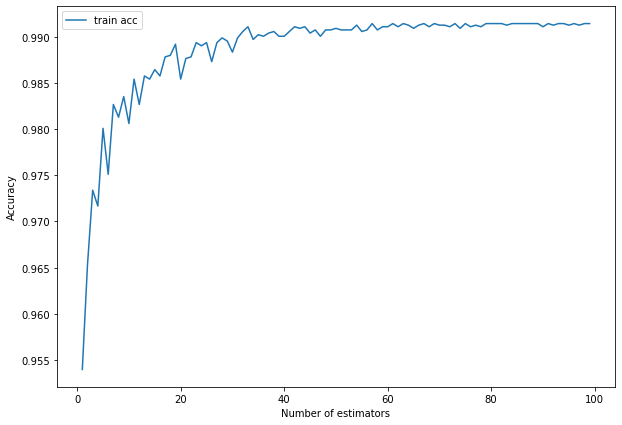

In [54]:
from sklearn import metrics

n_estimator_values = list(range(1,100))
train_accuracies, test_accuracies = [], []

for i in n_estimator_values:
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(train_x, train_y)
    y_pred_train = clf.predict(train_x)
    
    train_accuracies.append(metrics.accuracy_score(y_true=train_y, y_pred=y_pred_train))
    
plt.figure(figsize=(10,7))
plt.plot(n_estimator_values, train_accuracies, label='train acc')

plt.ylabel('Accuracy')
plt.xlabel('Number of estimators')

plt.legend()
plt.show()

3-2-2. Make a plot with changing the max depth.

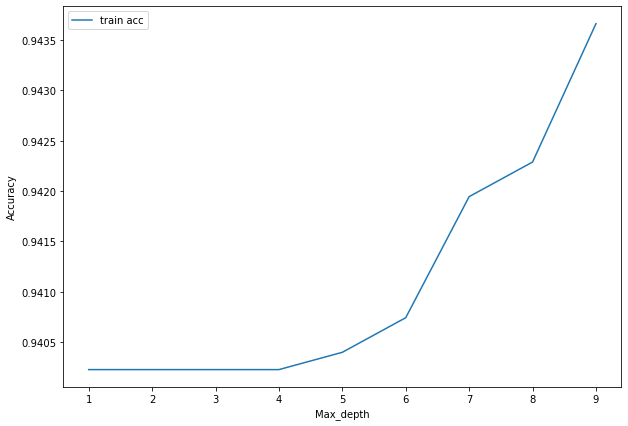

In [55]:
from sklearn import metrics

max_depth_values = list(range(1,10))
train_accuracies, test_accuracies = [], []

for i in max_depth_values:
    clf = RandomForestClassifier(max_depth=i)
    clf.fit(train_x, train_y)
    y_pred_train = clf.predict(train_x)
    
    train_accuracies.append(metrics.accuracy_score(y_true=train_y, y_pred=y_pred_train))
    
plt.figure(figsize=(10,7))
plt.plot(max_depth_values, train_accuracies, label='train acc')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')


plt.legend()
plt.show()

### 3-3. Apply the best hyperparameters to the randomforest classifiers and check the score of the models.

3-3-1. Make randomforest classifier with the criterion 'gini' and max depth 6.

In [56]:
forest1 = RandomForestClassifier(criterion = 'gini', max_depth = 6, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 3, n_jobs = -1)
forest1.fit(train_x, train_y)

forest1.score(train_x, train_y)

0.9400549639299209

3-3-2. Make randomforest classifier with the criterion 'entropy', max depth 6 and 7 estimators. -> the best parameter

In [57]:
forest2 = RandomForestClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 3) 
forest2.fit(train_x, train_y)

forest2.score(train_x, train_y)

0.9409137753349365

3-3-3. Make randomforest classifier with the criterion 'gini', max depth 10.

In [58]:
forest3 = RandomForestClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 3)
forest3.fit(train_x, train_y)

forest3.score(train_x, train_y)

0.94555135692202

3-3-4. Make randomforest classifier with the criterion 'entropy', max depth 10.

In [59]:
forest4 = RandomForestClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 3)
forest4.fit(train_x, train_y)

forest4.score(train_x, train_y)

0.9405702507729302

### 3-4. Check feature importances and visualize those.

3-4-1. Visualize the featuere importances with the forest1 model.

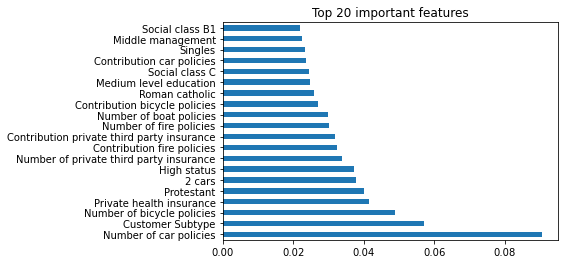

In [60]:
#criterion = 'gini', max_depth = 6, min_samples_leaf = 3, min_samples_split = 3, n_estimators = 7, n_jobs = -1
feat_importances = pd.Series(forest1.feature_importances_, index=train_x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top 20 important features")
plt.show()

<AxesSubplot:title={'center':'feature importances_max_10'}>

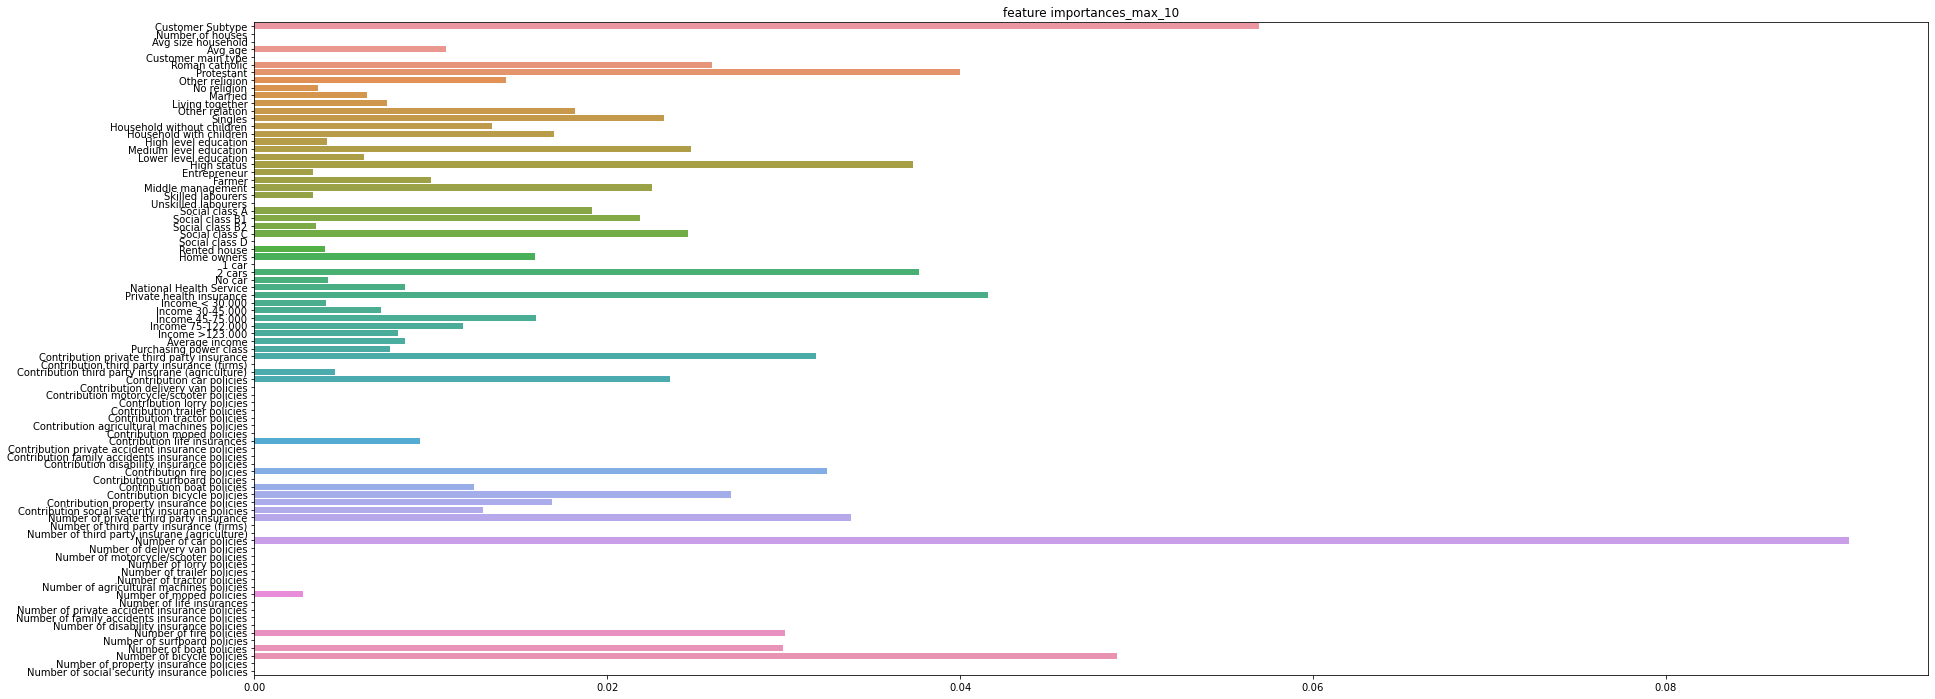

In [61]:
plt.figure(figsize = (30,12))
plt.title("feature importances_max_10")
sns.barplot(x = feat_importances, y = train_x.columns)

3-4-2. Visualize the featuere importances with the forest2 model.

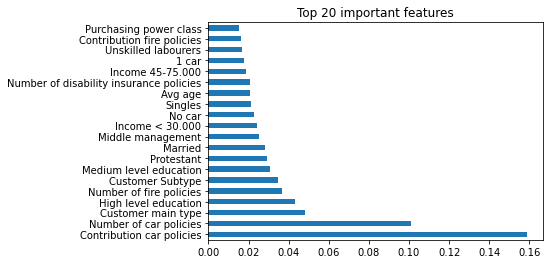

In [62]:
#criterion = 'entropy', max_depth = 6, min_samples_leaf = 3, min_samples_split = 3, n_estimators = 7, n_jobs = -1
feat_importances2 = pd.Series(forest2.feature_importances_, index=train_x.columns)
feat_importances2.nlargest(20).plot(kind='barh')
plt.title("Top 20 important features")
plt.show()

<AxesSubplot:title={'center':'feature importances_max_6'}>

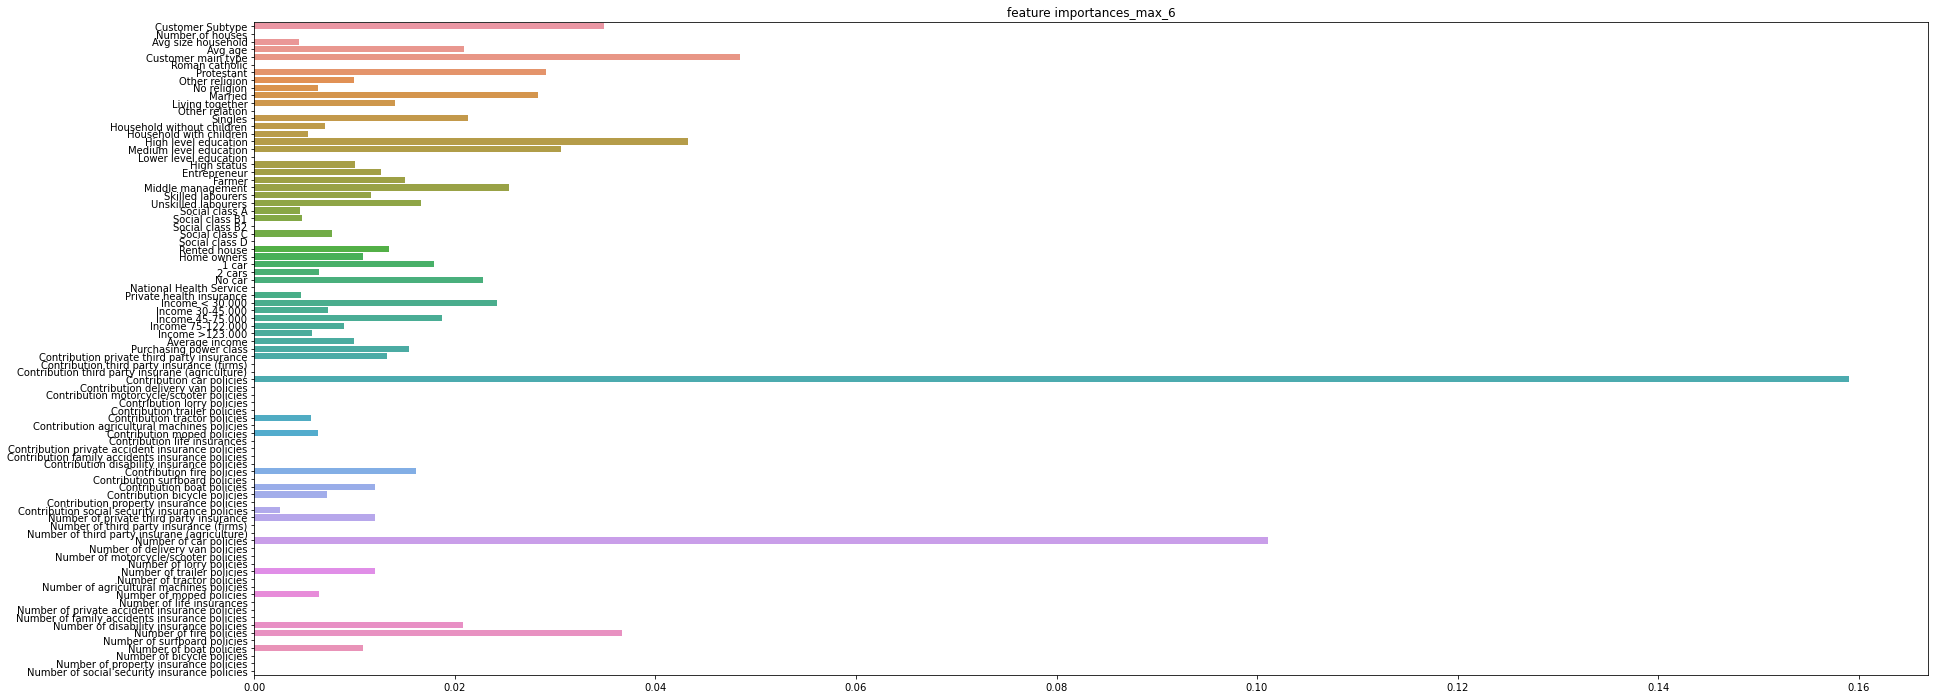

In [63]:
plt.figure(figsize = (30,12))
plt.title("feature importances_max_6")
sns.barplot(x = feat_importances2, y = train_x.columns)

3-4-3. Visualize the featuere importances with the forest3 model.

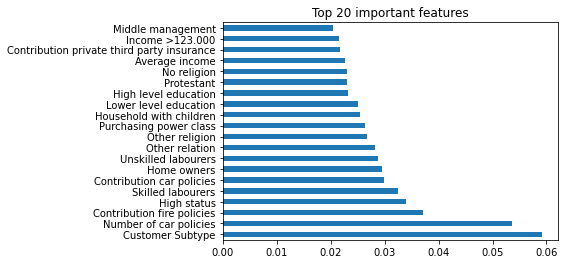

In [64]:
#criterion = 'gini', max_depth = 10, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 100
feat_importances3 = pd.Series(forest3.feature_importances_, index=train_x.columns)
feat_importances3.nlargest(20).plot(kind='barh')
plt.title("Top 20 important features")
plt.show()

<AxesSubplot:title={'center':'feature importances_max_10'}>

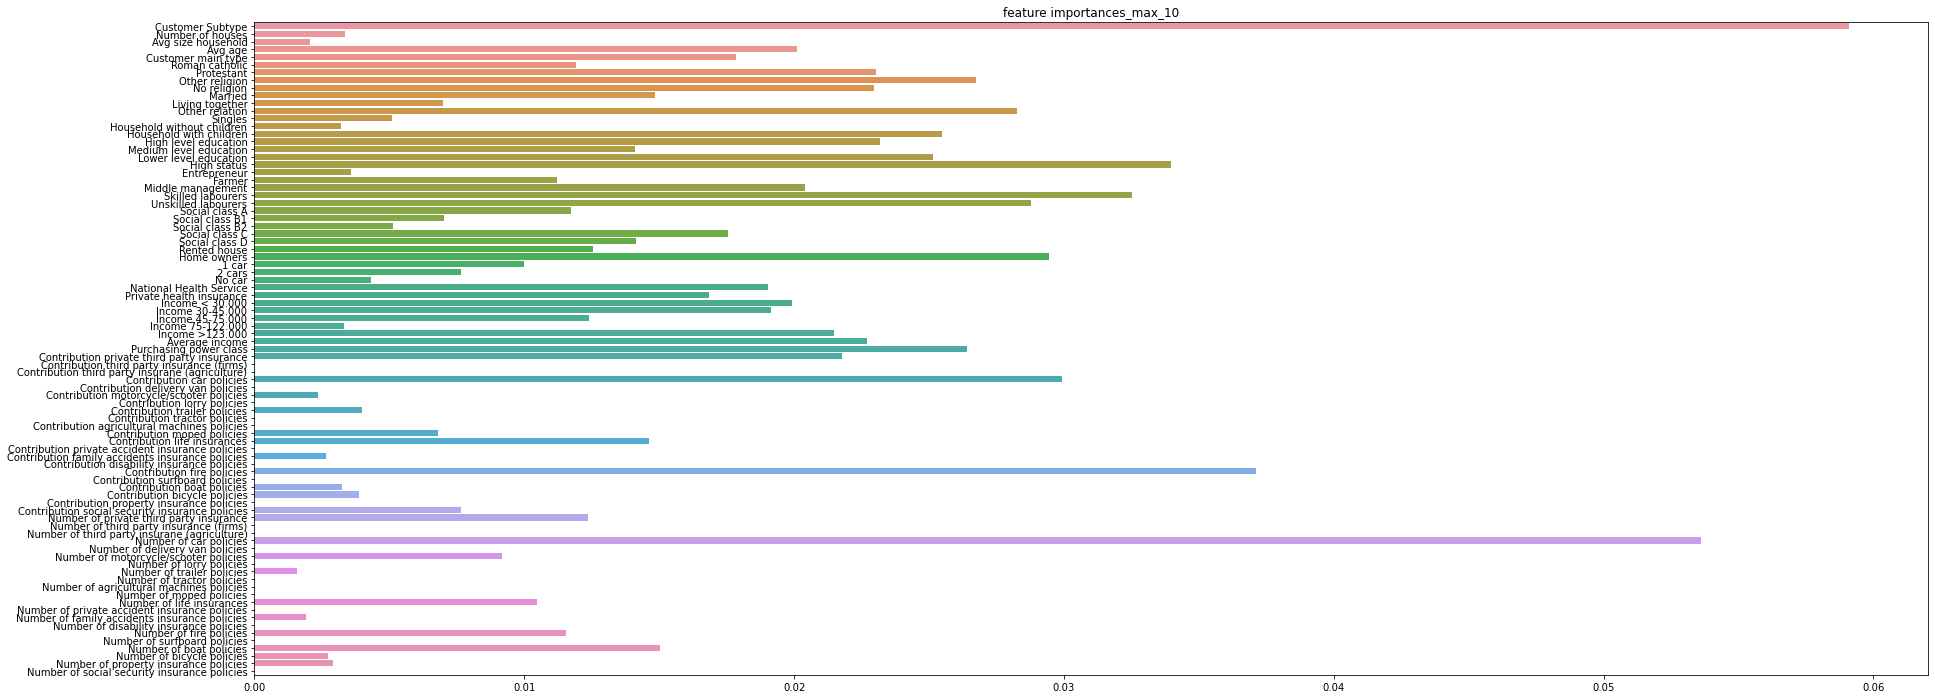

In [65]:
plt.figure(figsize = (30,12))
plt.title("feature importances_max_10")
sns.barplot(x = feat_importances3, y = train_x.columns)

3-4-4. Visualize the featuere importances with the forest4 model.

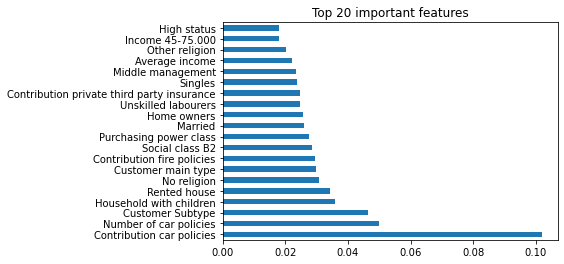

In [66]:
#criterion = 'entropy', max_depth = 10, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 100
feat_importances4 = pd.Series(forest4.feature_importances_, index=train_x.columns)
feat_importances4.nlargest(20).plot(kind='barh')
plt.title("Top 20 important features")
plt.show()

<AxesSubplot:title={'center':'feature importances_max_10'}>

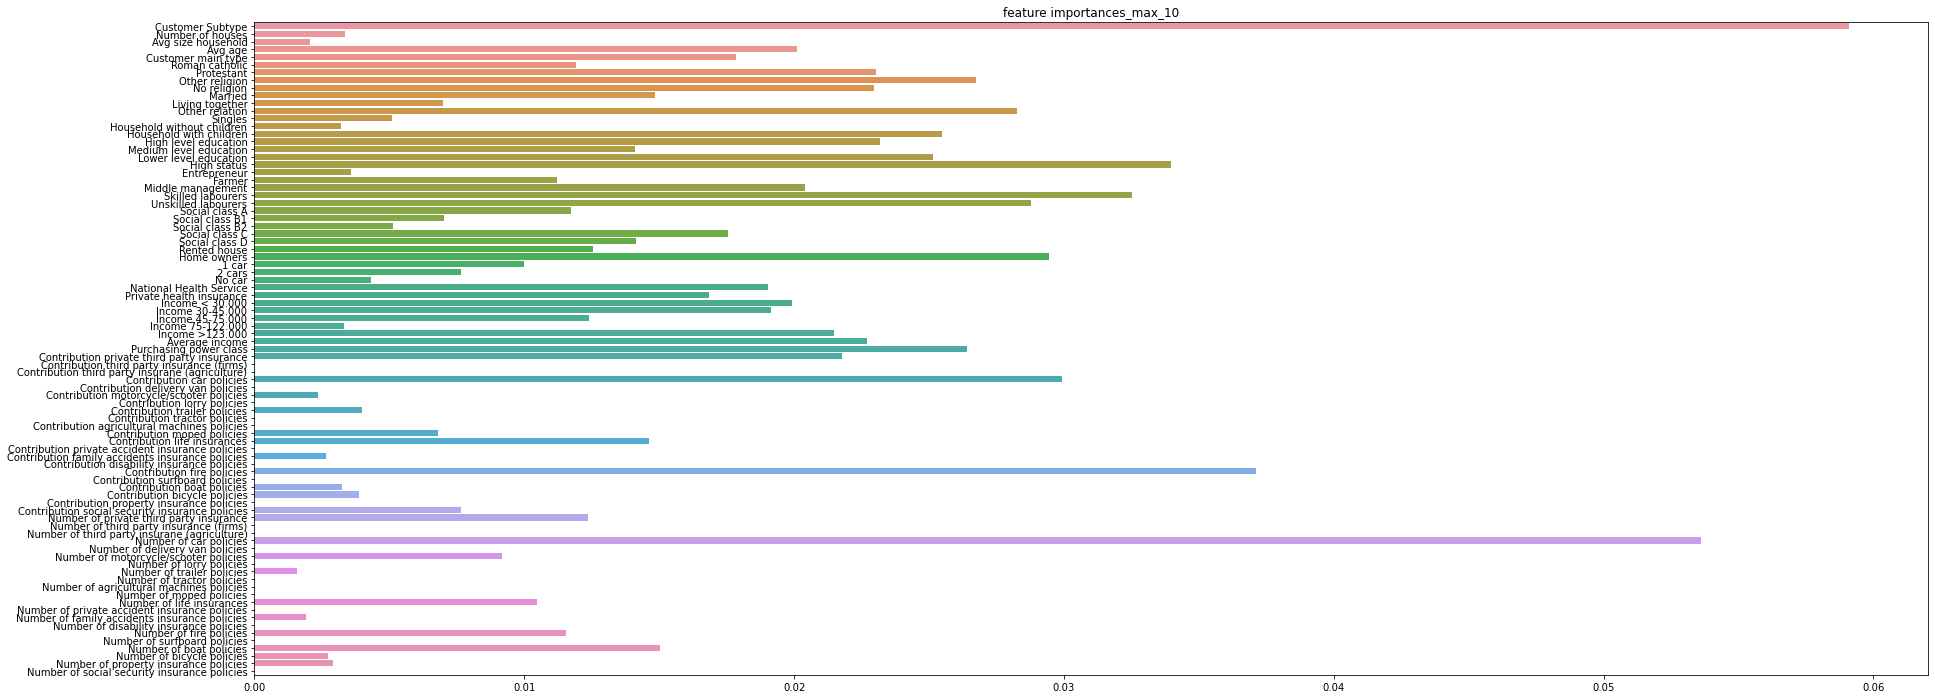

In [67]:
plt.figure(figsize = (30,12))
plt.title("feature importances_max_10")
sns.barplot(x = feat_importances3, y = train_x.columns)

We can see the top is not changed regarding of applying different models.

### 3-5. Export a decision tree in DOT format.

3-5-1. Export a decision tree in DOT format with the forest1 model.

In [68]:
from sklearn.tree import export_graphviz
estimator1 = forest1.estimators_[2]

export_graphviz(estimator1, out_file=None, 
                feature_names = train_x.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

{
    "tags": [
        "hide-output"
    ]
}

{'tags': ['hide-output']}

3-5-2. Export a decision tree in DOT format with the forest2 model.

In [69]:
estimator2 = forest2.estimators_[2]


export_graphviz(estimator2, out_file=None, 
                feature_names = train_x.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
{
    "tags": [
        "hide-output"
    ]
}

{'tags': ['hide-output']}

3-5-3. Export a decision tree in DOT format with the forest3 model.

In [70]:
estimator3 = forest3.estimators_[2]

export_graphviz(estimator3, out_file=None, 
                feature_names = train_x.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
{
    "tags": [
        "hide-output"
    ]
}

{'tags': ['hide-output']}

In [71]:
estimator4 = forest4.estimators_[2]

export_graphviz(estimator4, out_file=None, 
                feature_names = train_x.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
{
    "tags": [
        "hide-output"
    ]
}

{'tags': ['hide-output']}

### 3-6. Make decision trees.

There are elements in blue boxes labeled "Purchase" in the tree and column 86 shows 1. And the name of the parameter was not put in because the tree looked smaller if you put it in these trees of a larger size than before. If the figure size is increased, it is easy to check which one is selected to "Buy" category. 
But it is increased the memory, so I left the trees as smaller sizes.

3-6-1. Make plots for showing the decision trees with the forest1 model.

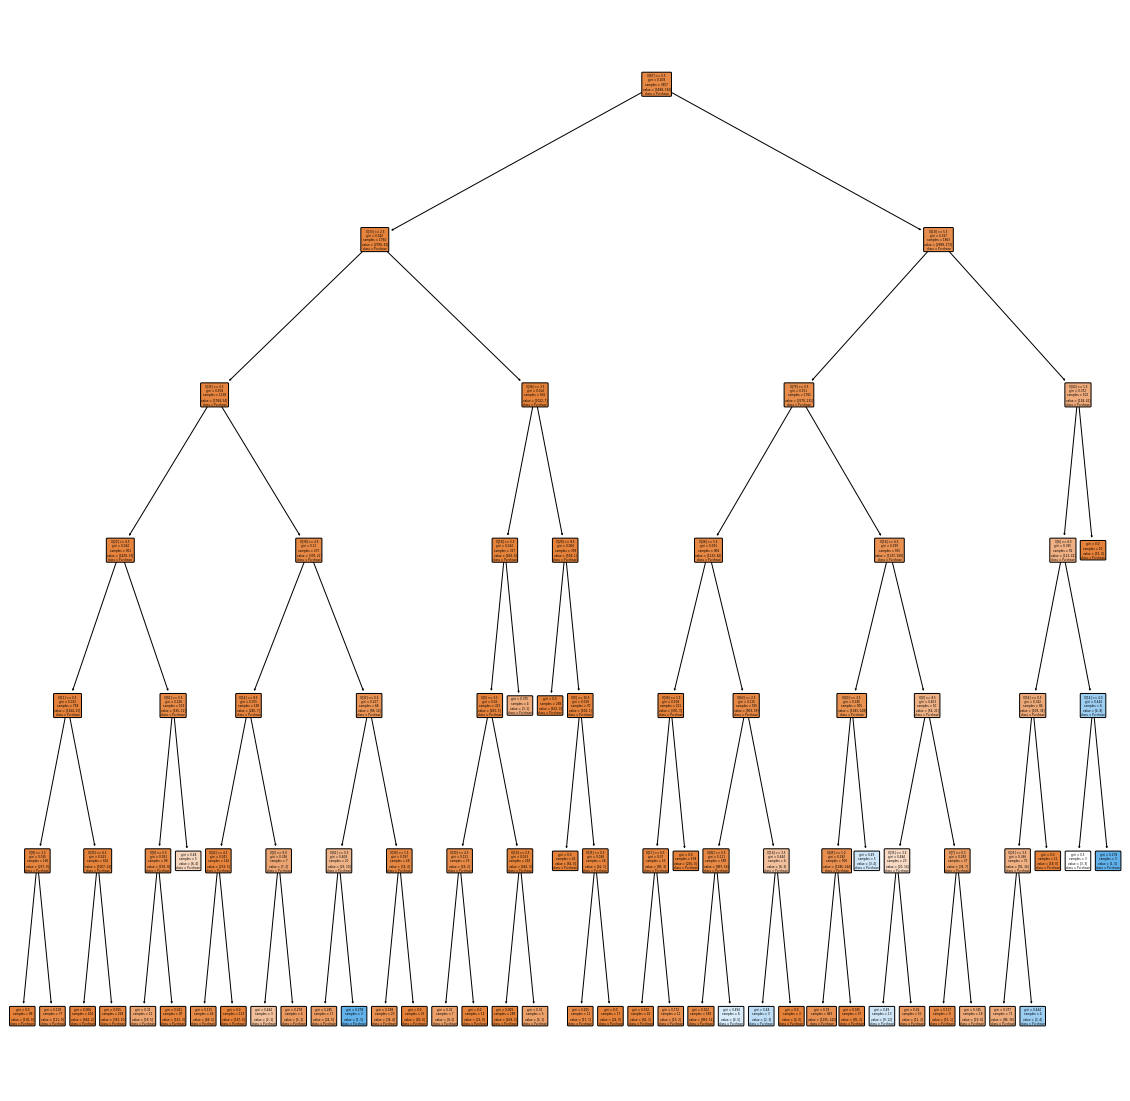

In [90]:
from sklearn.tree import plot_tree

#criterion = 'gini', max_depth = 6, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 3, n_jobs = -1
fig = plt.figure(figsize=(20, 20))
plot_tree(forest1.estimators_[0], class_names = ["Purchase","Purchase"],
          filled=True, impurity=True, 
          rounded=True)
plt.show()

In [91]:
fig.savefig('rf_tree1_max6_gini.png')

3-6-2. Make plots for showing the decision trees with the forest2 model.

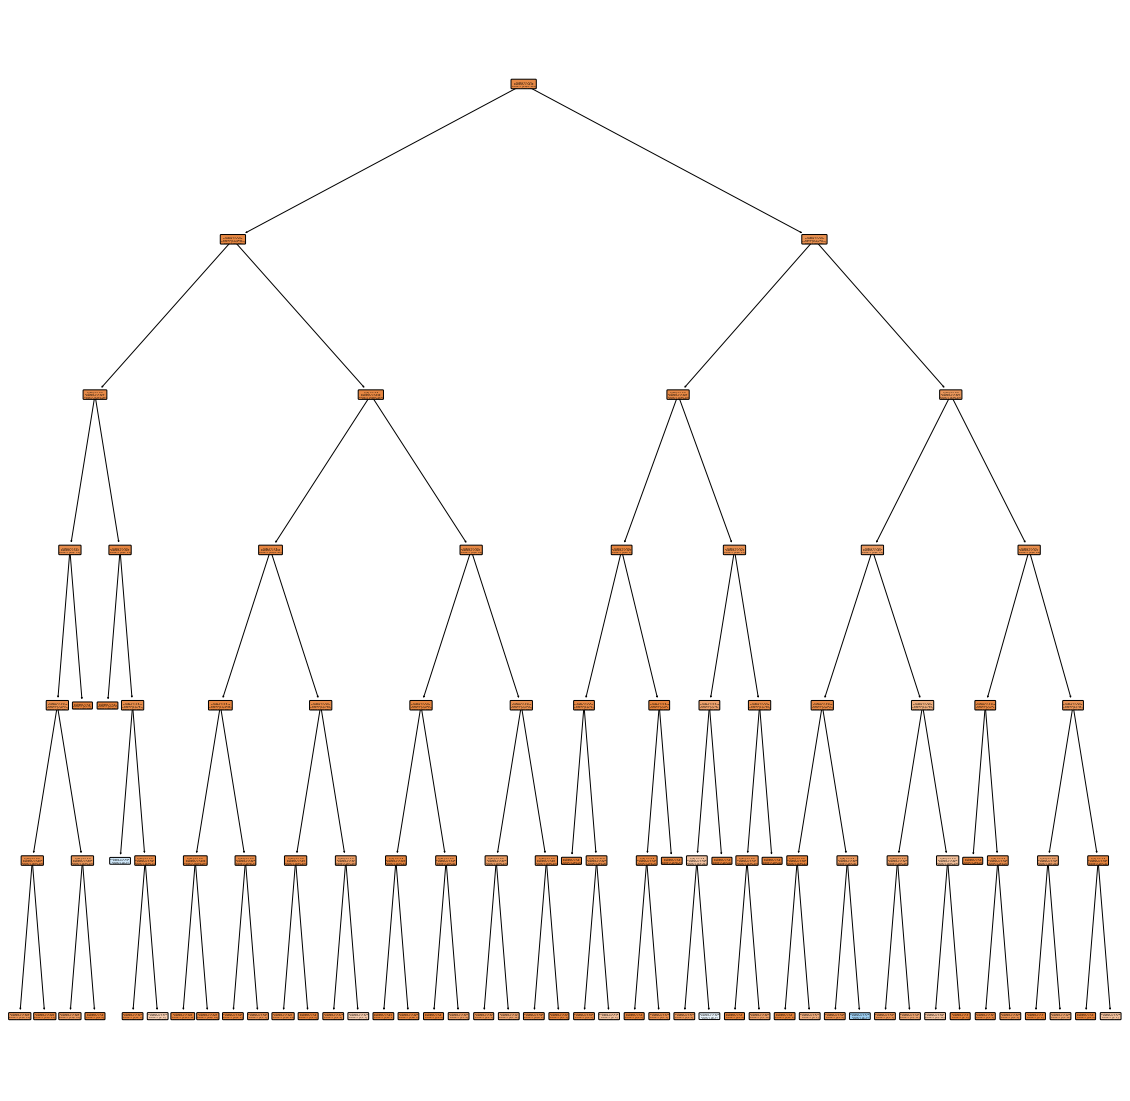

In [92]:
#criterion = 'entropy', max_depth = 6, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 3
fig = plt.figure(figsize=(20, 20))
plot_tree(forest2.estimators_[0], class_names = ["Not Buy","Buy"],
          filled=True, impurity=True, 
          rounded=True)
plt.show()

In [93]:
fig.savefig('rf_tree2_max6_en.png')

3-6-3. Make plots for showing the decision trees with the forest3 model.

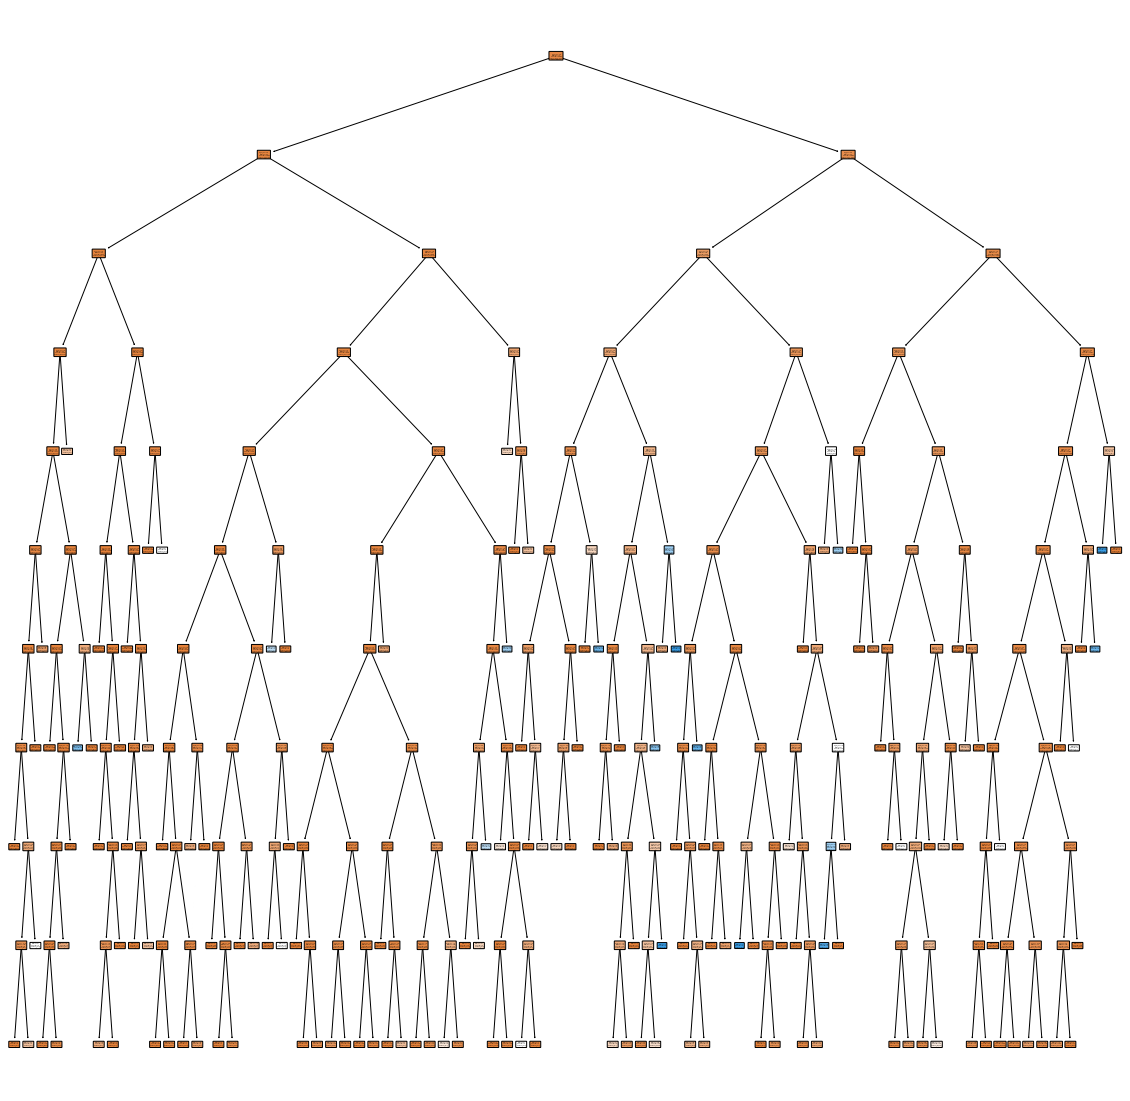

In [94]:
#criterion = 'gini', max_depth = 10, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 100
fig = plt.figure(figsize=(20, 20))
plot_tree(forest3.estimators_[0], class_names = ["Not Buy","Buy"],
          filled=True, impurity=True, 
          rounded=True)
plt.show()

3-6-4. Make plots for showing the decision trees with the forest4 model.

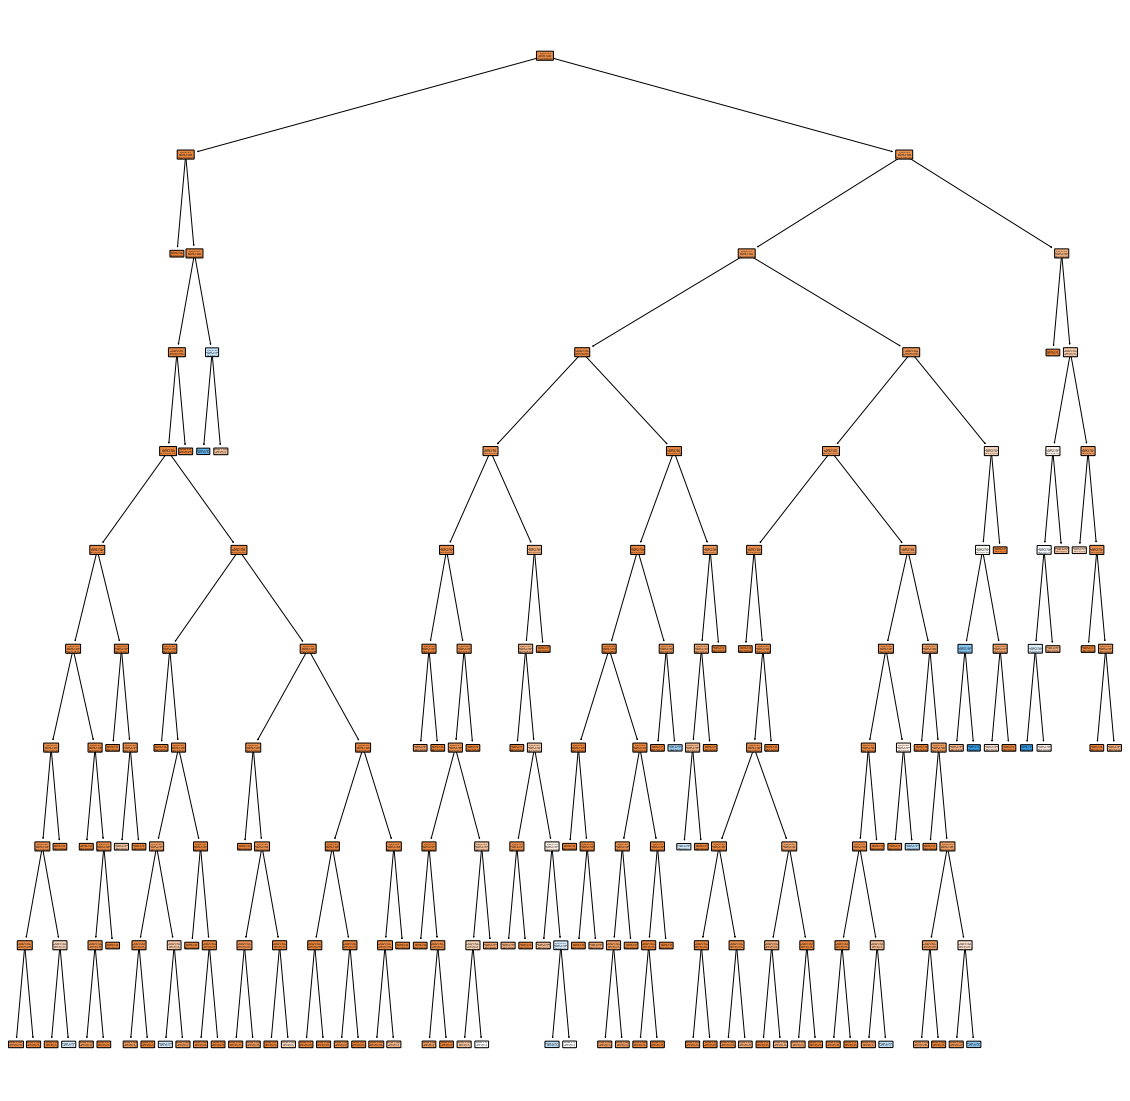

In [95]:
fig = plt.figure(figsize=(20, 20))
plot_tree(forest4.estimators_[0], class_names = ["Not Buy","Buy"],
          filled=True, impurity=True, 
          rounded=True)
plt.show()

### 3-7 . Predict the values of Caravan.

3-7-1. Predict the possibility of buying a caravan with forest1 model.

In [96]:
y_pred_rf1 = forest1.predict(test)
print("Predicted values:")
print(y_pred_rf1)

Predicted values:
[0 0 0 ... 0 0 0]


In [97]:
y_pred_rf1[y_pred_rf1 == 1]

array([], dtype=int64)

In [98]:
arr = np.array(y_pred_rf1)
print((arr==1).nonzero())
#238,  631,  789,  821,  934, 1304, 1413, 1565, 2273, 3499, 3503, 3518, 3615, 3840, 3842

(array([], dtype=int64),)


3-7-2. Predict the possibility of buying a caravan with forest2 model.

In [99]:
y_pred_rf2 = forest2.predict(test)
print("Predicted values:")
print(y_pred_rf2)

Predicted values:
[0 0 0 ... 0 0 0]


In [100]:
y_pred_rf2[y_pred_rf2 == 1]

array([1], dtype=int64)

In [101]:
arr = np.array(y_pred_rf2)
print((arr==1).nonzero())
#238,  631,  789,  821,  934, 1304, 1413, 1565, 2273, 3499, 3503, 3518, 3615, 3840, 3842

(array([3499], dtype=int64),)


3-7-3. Predict the possibility of buying a caravan with forest3 model.

In [102]:
y_pred_rf3 = forest3.predict(test)
print("Predicted values:")
print(y_pred_rf3)

Predicted values:
[0 0 0 ... 0 0 0]


In [103]:
y_pred_rf3[y_pred_rf3 == 1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [104]:
arr = np.array(y_pred_rf3)
print((arr==1).nonzero())
#238,  631,  789,  821,  934, 1304, 1413, 1565, 2273, 3499, 3503, 3518, 3615, 3840, 3842

(array([ 144,  330,  666,  789, 1282, 1363, 1367, 1467, 1689, 1819, 1821,
       2135, 2164, 2194, 2329, 2596, 2621, 2829, 3138, 3249, 3372, 3455,
       3482, 3503, 3615, 3838, 3871, 3910], dtype=int64),)


3-7-4. Predict the possibility of buying a caravan with forest4 model.

In [105]:
y_pred_rf4 = forest4.predict(test)
print("Predicted values:")
print(y_pred_rf4)

Predicted values:
[0 0 0 ... 0 0 0]


In [106]:
y_pred_rf4[y_pred_rf4 == 1]

array([], dtype=int64)

In [107]:
arr = np.array(y_pred_rf4)
print((arr==1).nonzero())

(array([], dtype=int64),)
